# 📊 Matplotlib vs Seaborn: Side-by-Side Visualization Tutorial
Learn how to plot the same dataset using both libraries to understand their differences and strengths.

## 1. Setup and Dataset

In [1]:

import seaborn as sns
import matplotlib.pyplot as plt

# Load sample dataset
tips = sns.load_dataset("tips")
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 2. Scatter Plot — Same Data, Two Libraries

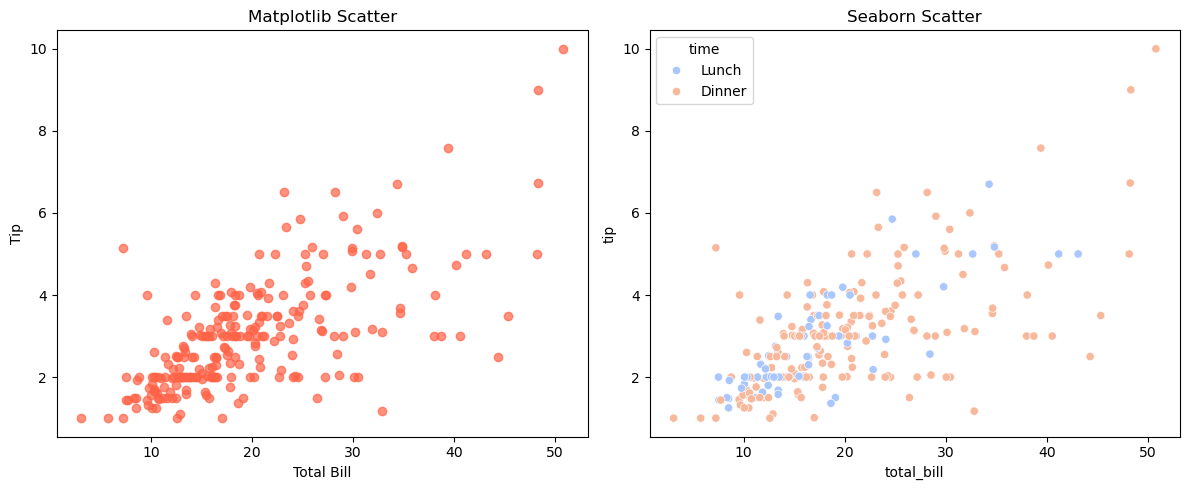

In [3]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matplotlib
axes[0].scatter(tips["total_bill"], tips["tip"], color="tomato", alpha=0.7)
axes[0].set_title("Matplotlib Scatter")
axes[0].set_xlabel("Total Bill")
axes[0].set_ylabel("Tip")

# Seaborn
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time", ax=axes[1], palette="coolwarm")
axes[1].set_title("Seaborn Scatter")

plt.tight_layout()
plt.show()


## 3. Bar Plot Comparison

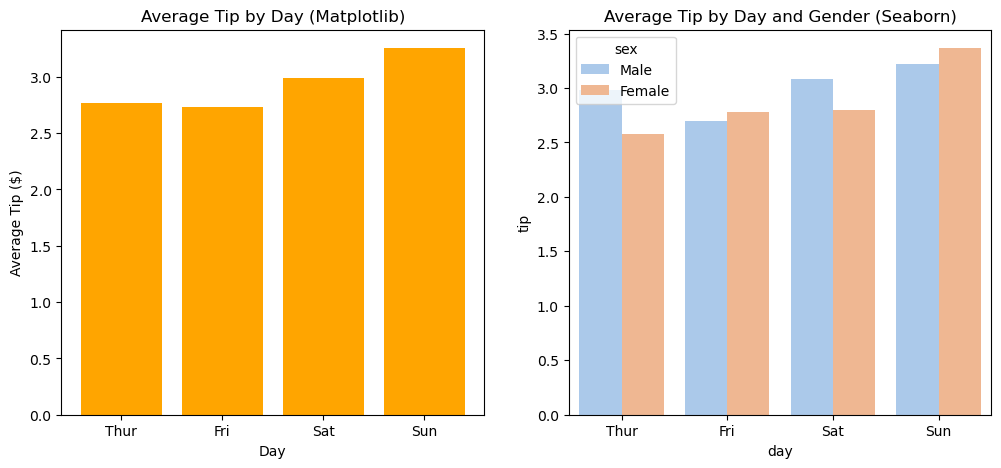

In [12]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Matplotlib ---
avg_tips = tips.groupby("day", observed=False)["tip"].mean()
axes[0].bar(avg_tips.index, avg_tips.values, color="orange")
axes[0].set_title("Average Tip by Day (Matplotlib)")
axes[0].set_xlabel("Day")
axes[0].set_ylabel("Average Tip ($)")


# --- Seaborn ---
sns.barplot(data=tips, x="day", y="tip", hue="sex", errorbar=None, palette="pastel", ax=axes[1])
axes[1].set_title("Average Tip by Day and Gender (Seaborn)")
plt.show()


## 4. Histogram Comparison

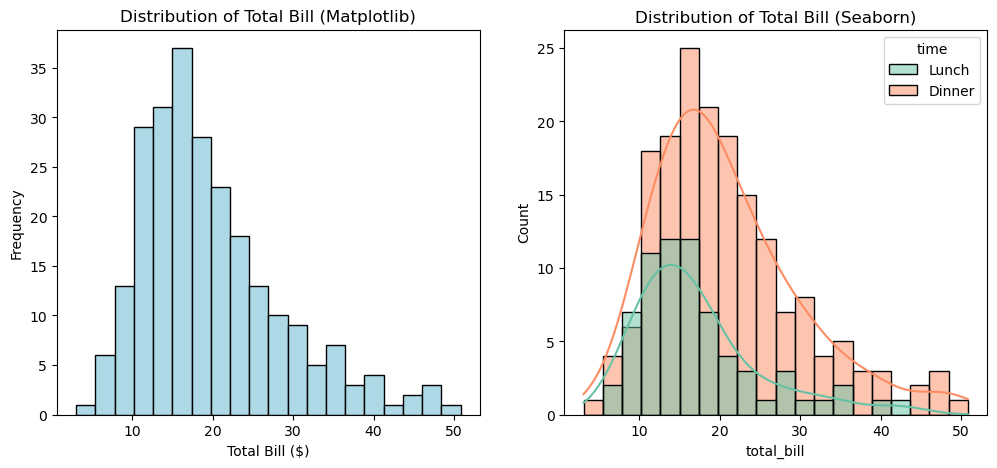

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Matplotlib ---
axes[0].hist(tips["total_bill"], bins=20, color="lightblue", edgecolor="black")
axes[0].set_title("Distribution of Total Bill (Matplotlib)")
axes[0].set_xlabel("Total Bill ($)")
axes[0].set_ylabel("Frequency")


# --- Seaborn ---
sns.histplot(data=tips, x="total_bill", hue="time", bins=20, kde=True, palette="Set2", ax=axes[1])
axes[1].set_title("Distribution of Total Bill (Seaborn)")
plt.show()


## 5. Box Plot Comparison

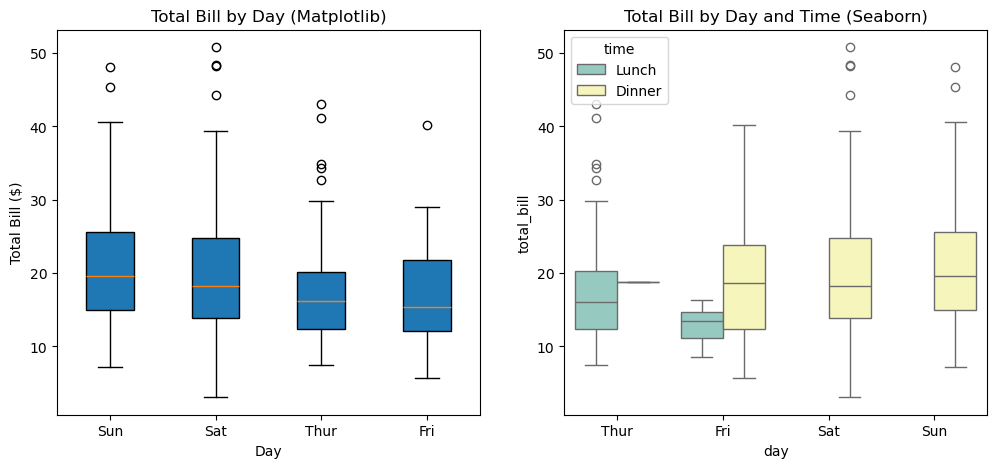

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Matplotlib ---
data = [tips[tips['day'] == d]["total_bill"] for d in tips["day"].unique()]
axes[0].boxplot(data, tick_labels=tips["day"].unique(), patch_artist=True)
axes[0].set_title("Total Bill by Day (Matplotlib)")
axes[0].set_xlabel("Day")
axes[0].set_ylabel("Total Bill ($)")


# --- Seaborn ---
sns.boxplot(data=tips, x="day", y="total_bill", hue="time", palette="Set3", ax=axes[1])
axes[1].set_title("Total Bill by Day and Time (Seaborn)")
plt.show()


## 7. Heatmap Comparison (Advanced)

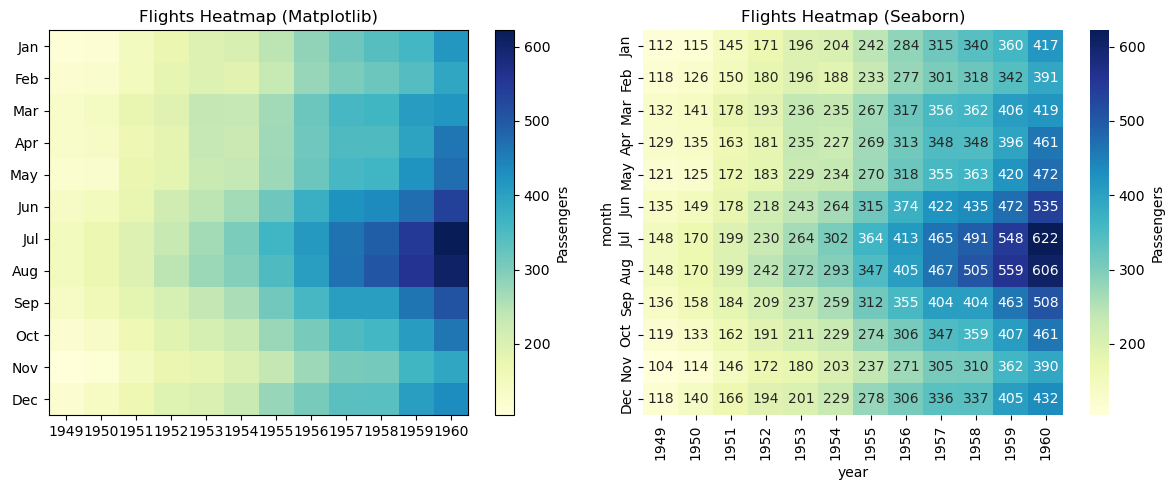

In [25]:
# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Prepare pivot data: Using correct .pivot() method signature (it expects index, columns, values)
# The "flights" dataset is often structured correctly for this.
flights = sns.load_dataset("flights").pivot(index="month", columns="year", values="passengers")

# --- Matplotlib ---
# 1. Use the return value of imshow() to create the colorbar.
# 2. Add ticks/labels for Matplotlib.
im = axes[0].imshow(flights, cmap="YlGnBu", aspect="auto")
axes[0].set_title("Flights Heatmap (Matplotlib)")

# Set the ticks and labels
axes[0].set_xticks(ticks=range(len(flights.columns)), labels=flights.columns)
axes[0].set_yticks(ticks=range(len(flights.index)), labels=flights.index)

# Create the color bar using the image object and the figure
cbar = fig.colorbar(im, ax=axes[0], orientation='vertical')
cbar.set_label("Passengers")


# --- Seaborn ---
# 1. Plot the heatmap on axes[1].
# 2. Set the title on axes[1].
sns.heatmap(flights, annot=True, fmt="d", cmap="YlGnBu", ax=axes[1], cbar_kws={'label': 'Passengers'})
axes[1].set_title("Flights Heatmap (Seaborn)") # FIX: Changed axes[0] to axes[1]

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()
plt.show()

## Summary 

We can see that matplotlib process one category(legend) a one time so to generate the equivalent of a grouped or colored chart from Seaborn in pure Matplotlib, you'll need to manually iterate over the unique categories in the grouping column (the equivalent of Seaborn's `hue` or `color` column). Inside the loop, you must filter the data to get the subset for the current category, and then use the appropriate Matplotlib plotting function (e.g., `plt.plot()`, `plt.bar()`, `plt.hist()`, etc.) to plot only that subset, explicitly assigning a distinct `color` and a `label` for the legend on each iteration.

---

### **Specific Application by Chart Type**

The core process remains the same, but the Matplotlib function you call changes:

| Chart Type | Seaborn Equivalent (with `hue`) | Matplotlib Function Used in Loop |
| :--- | :--- | :--- |
| **Scatter Plot** | `sns.scatterplot(..., hue="category")` | `ax.scatter()` |
| **Line Plot** | `sns.lineplot(..., hue="category")` | `ax.plot()` |
| **Bar Chart** | `sns.barplot(..., hue="category")` | `ax.bar()` |
| **Histogram** | `sns.histplot(..., hue="category")` | `ax.hist()` (often with `stack=False`) |

This manual iteration ensures that Matplotlib treats the grouped data as separate graphical elements, allowing the `ax.legend()` function to correctly display the key for each category.